In [25]:
import os
import sys

sys.path.append(os.path.abspath(".."))

import matplotlib.pyplot as plt
import networkx as nx
from rdkit import Chem
from torch_geometric.utils import from_smiles, to_networkx, tree_decomposition

from src.data import MoleculeNetDataset
from src.transform import ReducedGraph, getErGData

molecule_net_dataset = MoleculeNetDataset(
    root="../data/molecule_net", target_task="lipo", force_reload=True
).create_dataset()
molecule_net_dataset[0]


def draw_graph(G):
    plt.figure(figsize=(4, 4))
    nx.draw(G, with_labels=True, node_color="lightblue", node_size=50, font_weight="bold")
    plt.show()

def draw_data(data):
    G = to_networkx(data)
    G = nx.to_undirected(G)
    draw_graph(G)

Processing...
Done!


ReducedGraphData(x=[14, 9], edge_index=[2, 30], edge_attr=[30, 3], smiles='O=C(NC)C1=C(Cl)C2=CC=CC=C2S1', node_feat=[14, 9], edge_feat=[30, 3], rg_edge_index_0=[2, 28], mapping_0=[2, 20], rg_num_atoms_0=11, rg_atom_features_0=[11], raw_num_atoms_0=14)

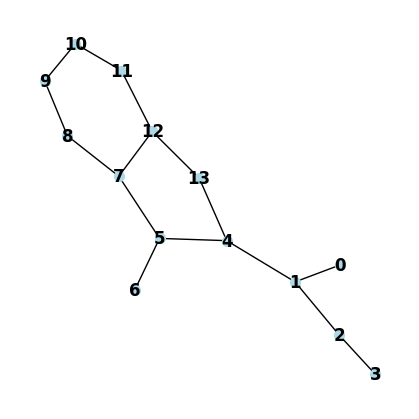

tensor([2, 0, 1, 0, 0, 0, 0, 0, 0, 6, 6])

In [ ]:
# Define the molecules
smiles = "O=C(NC)C1=C(Cl)C2=CC=CC=C2S1"
# smiles = "CCCCC(C)(C)CCSCC"
data = from_smiles(smiles)

# Reduced Graph
reduced_graph_generator = ReducedGraph(use_erg=True, use_jt=False, jt_coarsity=None)
erg = reduced_graph_generator(data)

display(erg)
draw_data(erg)
display(erg.rg_atom_features_0)

ReducedGraphData(rg_edge_index=[2, 28], mapping=[2, 20], rg_atom_features=[11], rg_num_atoms=11, raw_num_atoms=14, edge_index=[2, 28])

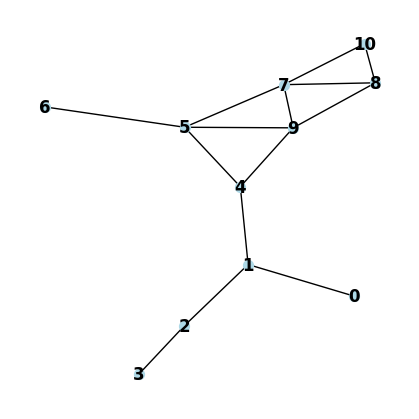

In [15]:
mol = Chem.MolFromSmiles(smiles)
erg_data = getErGData(mol, data.x.size(0))
erg_data.edge_index = erg_data.rg_edge_index
display(erg_data)
draw_data(erg_data)

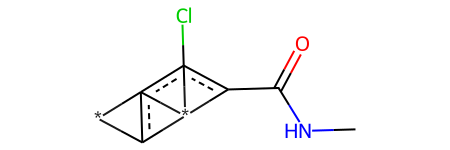

In [16]:
# Generate ErG From RDKIT
from rdkit.Chem.rdReducedGraphs import GenerateMolExtendedReducedGraph

mol = Chem.MolFromSmiles(smiles)
erg = GenerateMolExtendedReducedGraph(mol)
erg

In [18]:
# Junction Tree
junction_tree = tree_decomposition(mol)
junction_tree

(tensor([[0, 0, 0, 1, 2, 3, 3, 4, 5, 5, 6, 7, 7, 7],
         [1, 5, 6, 0, 7, 4, 7, 3, 0, 7, 0, 2, 3, 5]]),
 tensor([[ 0,  1,  1,  1,  1,  2,  2,  3,  4,  4,  5,  5,  6,  7,  7,  8,  9, 10,
          11, 12, 12, 13],
         [ 2,  2,  3,  5,  7,  3,  4,  4,  0,  5,  0,  6,  6,  0,  1,  1,  1,  1,
           1,  0,  1,  0]]),
 8)